Test LOC vs. Total LOC:
  Pearson Correlation: -0.03, P-value: 0.824
  Spearman Correlation: 0.15, P-value: 0.217

Test LOC vs. Closed PRs:
  Pearson Correlation: 0.27, P-value: 0.026
  Spearman Correlation: 0.20, P-value: 0.104


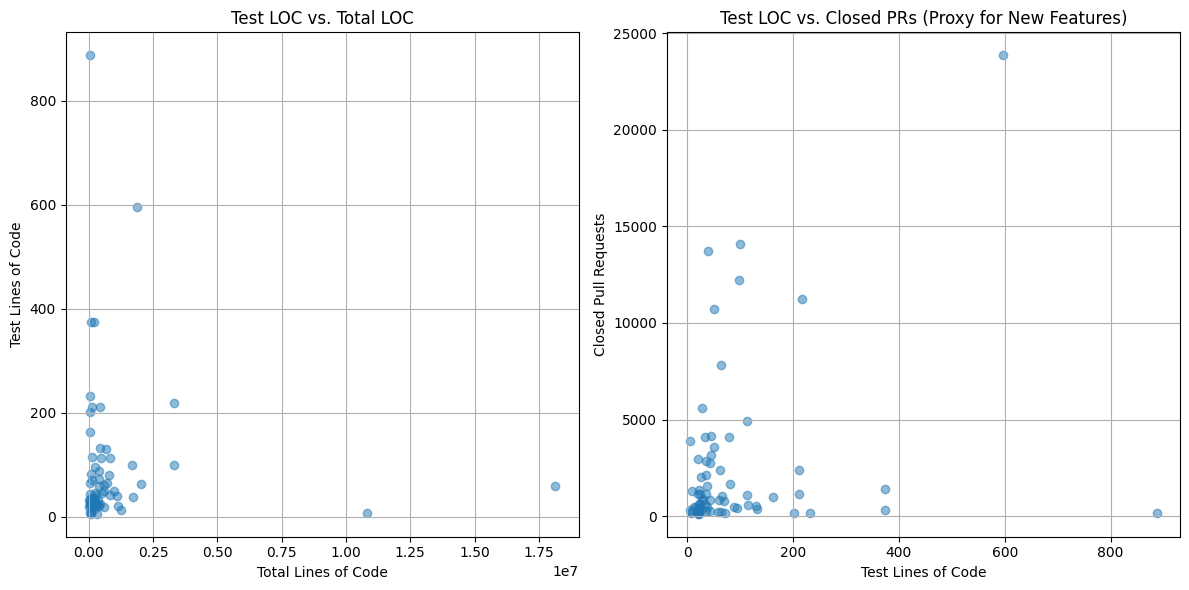


Addressing RQ2:
The analysis found a Very Weak or No correlation between test LOC and total LOC.
The analysis found a Very Weak or No correlation between test LOC and closed PRs (proxy for new features).


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats
import matplotlib.pyplot as plt


try:
    df = pd.read_csv('./updated.csv')
except FileNotFoundError:
    print("Error: CSV file not found. Please provide the correct file path.")
    exit()

numeric_cols = ['stars', 'issues', 'open_prs', 'closed_prs', 'total_prs', 'size_mb', 'total_LOC', 'test_LOC']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

df.dropna(subset=['total_LOC', 'test_LOC', 'closed_prs'], inplace=True)

features = ['total_LOC', 'test_LOC', 'closed_prs']
feature_matrix = df[features].values

similarity_matrix = cosine_similarity(feature_matrix)

test_loc_total_loc_corr_pearson, test_loc_total_loc_p_value_pearson = stats.pearsonr(df['test_LOC'], df['total_LOC'])
test_loc_closed_prs_corr_pearson, test_loc_closed_prs_p_value_pearson = stats.pearsonr(df['test_LOC'], df['closed_prs'])

test_loc_total_loc_corr_spearman, test_loc_total_loc_p_value_spearman = stats.spearmanr(df['test_LOC'], df['total_LOC'])
test_loc_closed_prs_corr_spearman, test_loc_closed_prs_p_value_spearman = stats.spearmanr(df['test_LOC'], df['closed_prs'])

print("Test LOC vs. Total LOC:")
print(f"  Pearson Correlation: {test_loc_total_loc_corr_pearson:.2f}, P-value: {test_loc_total_loc_p_value_pearson:.3f}")
print(f"  Spearman Correlation: {test_loc_total_loc_corr_spearman:.2f}, P-value: {test_loc_total_loc_p_value_spearman:.3f}")

print("\nTest LOC vs. Closed PRs:")
print(f"  Pearson Correlation: {test_loc_closed_prs_corr_pearson:.2f}, P-value: {test_loc_closed_prs_p_value_pearson:.3f}")
print(f"  Spearman Correlation: {test_loc_closed_prs_corr_spearman:.2f}, P-value: {test_loc_closed_prs_p_value_spearman:.3f}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['total_LOC'], df['test_LOC'], alpha=0.5)
plt.title('Test LOC vs. Total LOC')
plt.xlabel('Total Lines of Code')
plt.ylabel('Test Lines of Code')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['test_LOC'], df['closed_prs'], alpha=0.5)
plt.title('Test LOC vs. Closed PRs (Proxy for New Features)')
plt.xlabel('Test Lines of Code')
plt.ylabel('Closed Pull Requests')
plt.grid(True)

plt.tight_layout()
plt.show()



# Addressing RQ2 Directly
print("\nAddressing RQ2:")

def interpret_correlation(correlation, p_value):
    strength = abs(correlation)
    if strength > 0.7:
        return "Strong"
    elif strength > 0.5:
        return "Moderate"
    elif strength > 0.3:
        return "Weak"
    else:
        return "Very Weak or No"

strength_loc = interpret_correlation(test_loc_total_loc_corr_pearson, test_loc_total_loc_p_value_pearson)
strength_prs = interpret_correlation(test_loc_closed_prs_corr_pearson, test_loc_closed_prs_p_value_pearson)

print(f"The analysis found a {strength_loc} correlation between test LOC and total LOC.")
print(f"The analysis found a {strength_prs} correlation between test LOC and closed PRs (proxy for new features).")
